In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100, 1) - 3 # rand(shape)
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'Y dataset')

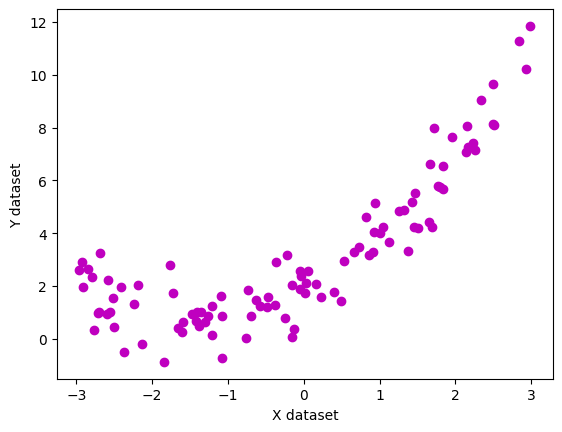

In [13]:
plt.scatter(X, y, color='m')
plt.xlabel('X dataset')
plt.ylabel("Y dataset")

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# it's only very close to 1, so no need to standrazised it
# Lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [19]:
regression_1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
from sklearn.metrics import  r2_score
score = r2_score(y_test, regression_1.predict(X_test))
print(score)

0.6262700379550634


Text(0, 0.5, 'Y')

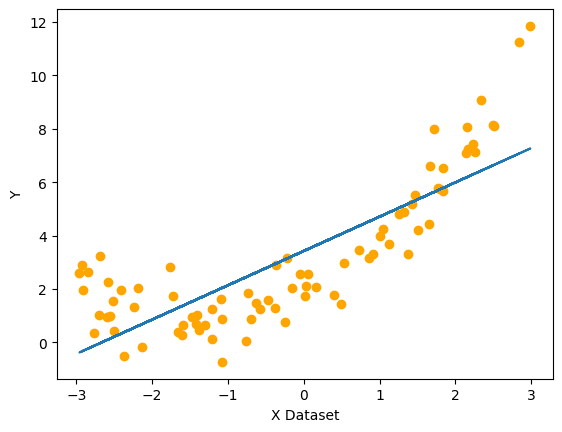

In [29]:
# let's visualize this one:
plt.scatter(X_train, y_train, color='orange')
plt.plot(X_train, regression_1.predict(X_train))
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, regression_1.predict(X_train)))
print(mean_squared_error(y_test, regression_1.predict(X_test)))

2.550679793982078
3.3424764702536853


* **To fit best line to reduce error we use polynomial regression**

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [59]:
X_train_poly # 1, x, x^2

array([[ 1.00000000e+00,  2.22937065e+00,  4.97009349e+00],
       [ 1.00000000e+00,  1.25513699e+00,  1.57536887e+00],
       [ 1.00000000e+00, -2.24641059e+00,  5.04636054e+00],
       [ 1.00000000e+00, -2.69783531e+00,  7.27831535e+00],
       [ 1.00000000e+00,  1.65234769e+00,  2.73025288e+00],
       [ 1.00000000e+00, -2.54567330e-01,  6.48045257e-02],
       [ 1.00000000e+00, -1.75984974e+00,  3.09707110e+00],
       [ 1.00000000e+00, -5.73792266e-01,  3.29237565e-01],
       [ 1.00000000e+00, -1.56255478e-01,  2.44157744e-02],
       [ 1.00000000e+00,  1.12633819e+00,  1.26863771e+00],
       [ 1.00000000e+00, -2.59884728e+00,  6.75400720e+00],
       [ 1.00000000e+00, -2.36669828e+00,  5.60126073e+00],
       [ 1.00000000e+00,  1.00839503e+00,  1.01686053e+00],
       [ 1.00000000e+00, -2.13960023e+00,  4.57788915e+00],
       [ 1.00000000e+00,  2.57175884e-02,  6.61394352e-04],
       [ 1.00000000e+00, -2.41337115e+00,  5.82436029e+00],
       [ 1.00000000e+00, -4.78578352e-01

In [60]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score2 = r2_score(y_test, y_pred)
print(score2)

0.9001558389479454


In [61]:
print(regression.coef_)

[[0.         1.4710363  0.53010014]]


In [62]:
print(regression.intercept_)

[1.8377463]


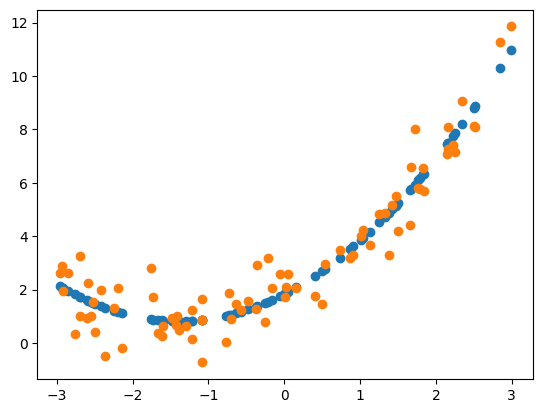

In [63]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [54]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [55]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score2 = r2_score(y_test, y_pred)
print(score2)

0.8969995207951202


In [64]:
## Predicton of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

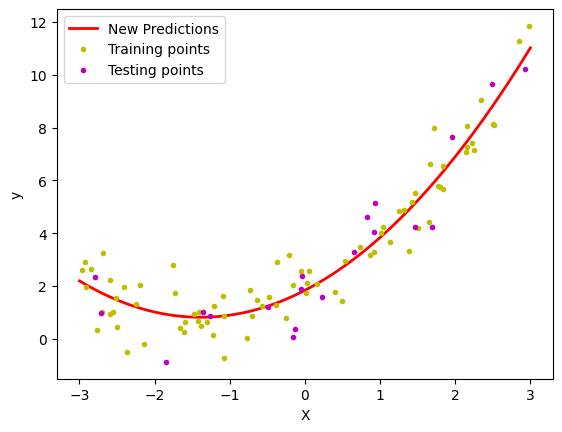

In [73]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(X_train, y_train, 'y.', label="Training points")
plt.plot(X_test, y_test, "m.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concept

In [74]:
from sklearn.pipeline import Pipeline

In [102]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) # creating poly feature and then fit by 
    y_pred_new = poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label='Degree' + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "m.", linewidth=3)
    plt.plot(X_test, y_test, "y.", linewidth=3)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.axis([-4, 4, 0, 10])

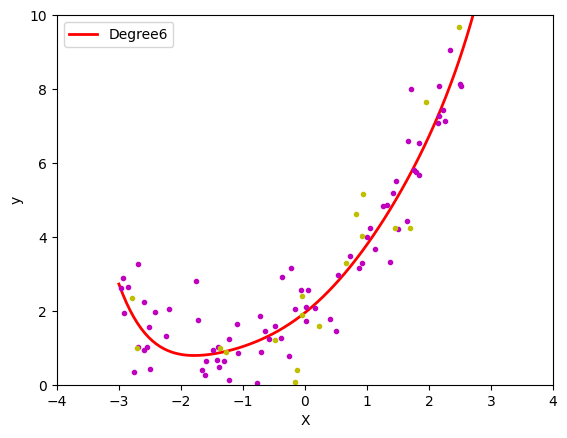

In [103]:
poly_regression(6)